# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
data = pd.read_csv('medical_cost_insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


# Exploratory Data Analysis(EDA)

In [6]:
#checking the dimension of data
data.shape

(1338, 7)

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#checking the columns of dataset
data.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [9]:
#checking the types of columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
data.isnull().sum().sum()

0

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

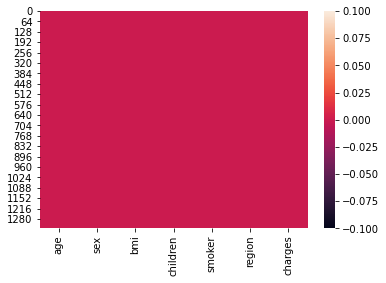

In [13]:
#lets visualize it using heatmap
sns.heatmap(data.isnull())

In [14]:
#checking the value counts of each column
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
11987.16820    1
7624.63000     1
12523.60480    1
10355.64100 

In [15]:
data.shape[0]

1338

In [16]:
#Separating Numerical and Categorical columns

#Checking for categorical columns
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i] == "object":
        categorical_col.append(i)
        
print("Categorical Columns: ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!= "object":
        numerical_col.append(i)
        
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']




In [17]:
# Checking number of unique values in each column
data.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


# Desciption of Dataset

In [18]:
# Statistical summary of numerical column
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization

# Univariat Analysis

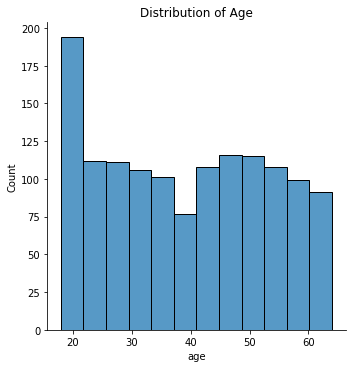

In [19]:
# Visualize the distribution of age 
ax = sns.displot(data['age'])
plt.title('Distribution of Age')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

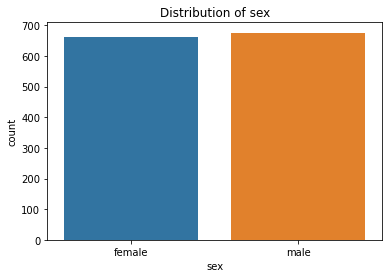

In [20]:
# visualization of sex variables

sns.countplot(x = 'sex', data = data)
plt.title('Distribution of sex')
plt.show

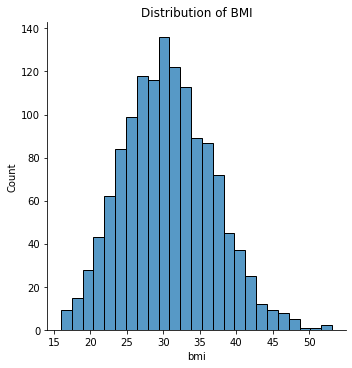

In [21]:
# visualization of bmi variable

sns.displot(data['bmi'])
plt.title('Distribution of BMI')
plt.show()

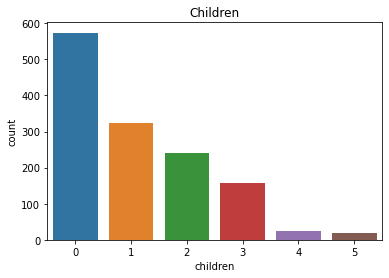

In [22]:
# plot of children variable

sns.countplot(x = 'children', data = data)
plt.title('Children')
plt.show()

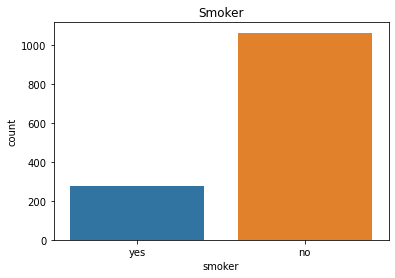

In [23]:
# plot of smoker variable

sns.countplot(x = 'smoker', data = data)
plt.title('Smoker')
plt.show()

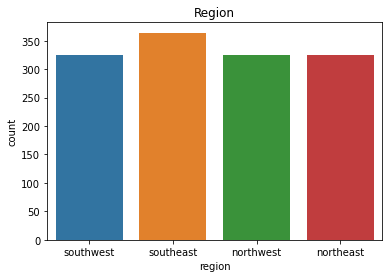

In [24]:
# plot of region variable

sns.countplot(x = 'region', data = data)
plt.title('Region')
plt.show()

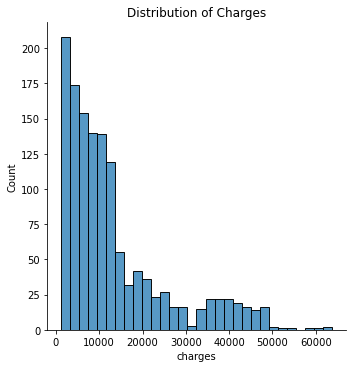

In [25]:
# distribution of charges variable

sns.displot(data['charges'])
plt.title('Distribution of Charges')
plt.show()

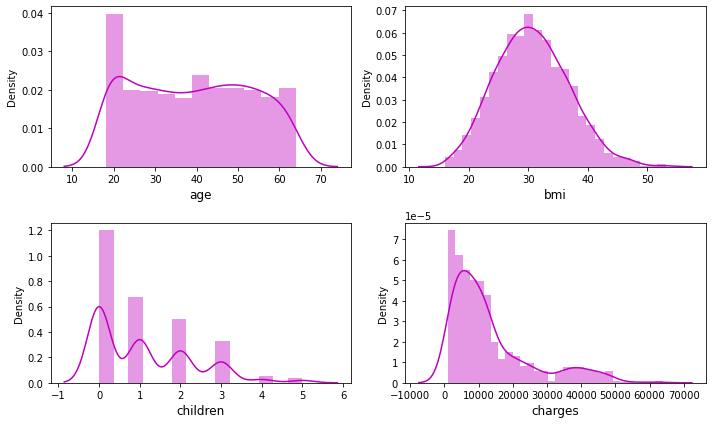

In [26]:
#let's check how the data has been distributed in remaining column
from socket import socket
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[col], color = "m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Checking for Outliers

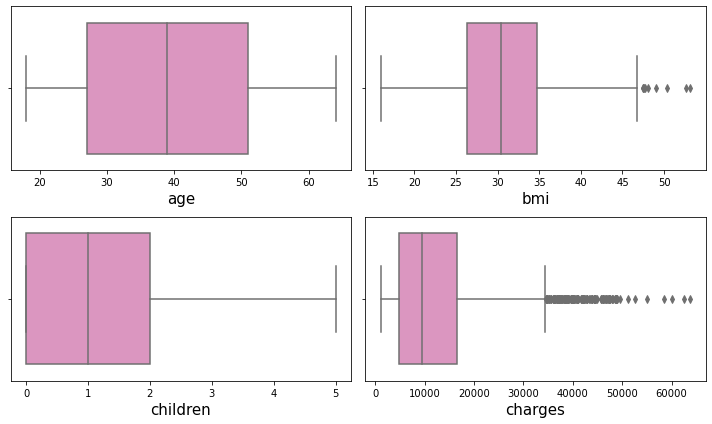

In [27]:
# Lets check the outliers by plotting boxplot

plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(data[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Checking for skweness

In [28]:
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# Encoding categorical columns

In [29]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i] = OE.fit_transform(data[i].values.reshape(-1, 1))
data

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [31]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# Correlation between target variable and independent variables.

In [32]:
# Checking the correlation between features and the target
cor = data.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


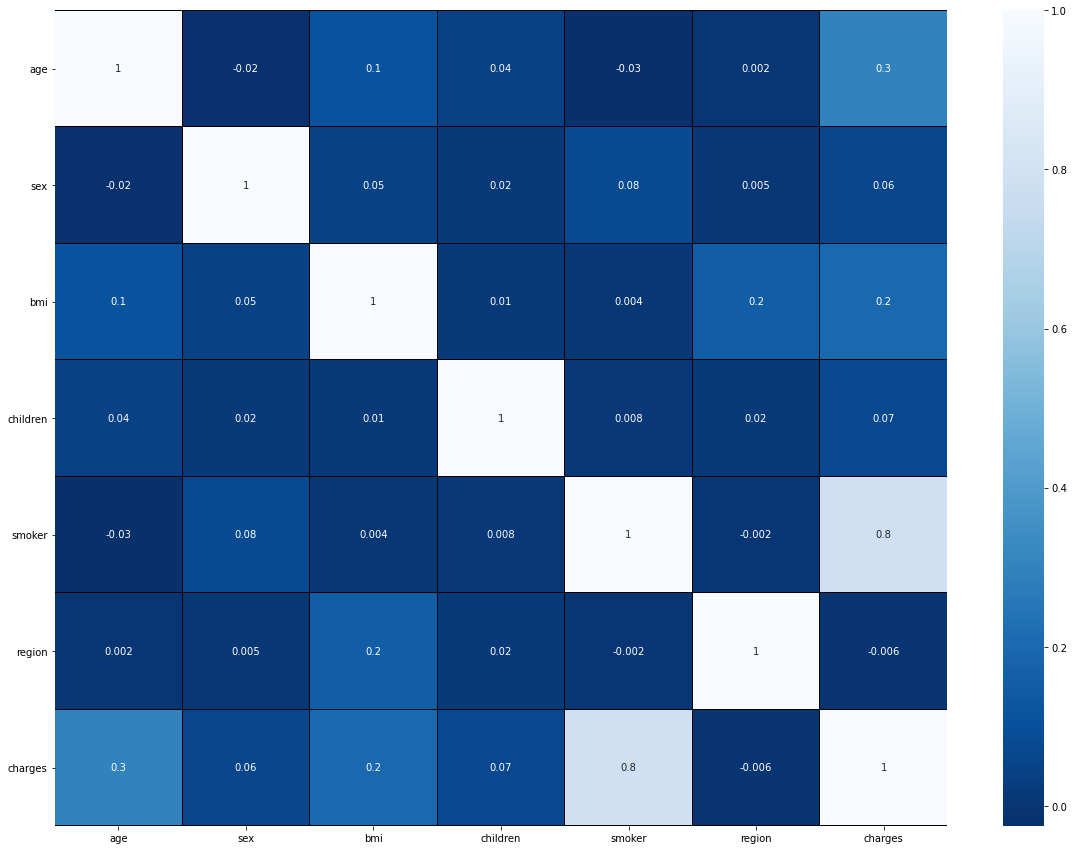

In [33]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(data.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

In [34]:
cor['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

# Visualizing the correlation between label and features using bar plot

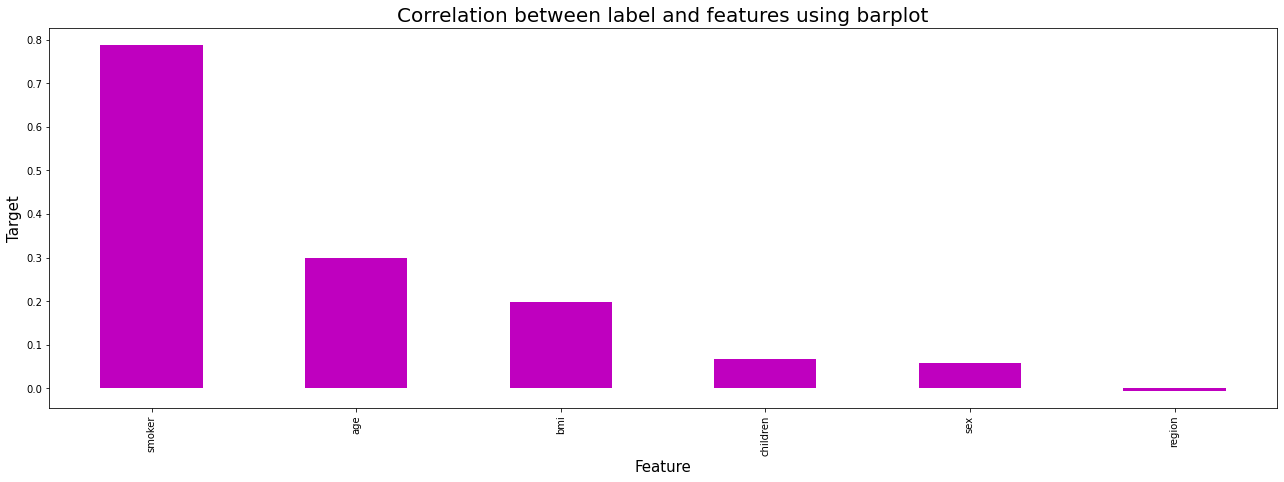

In [35]:
plt.figure(figsize = (22, 7))
data.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind = 'bar', color = "m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)
plt.show()

# Separating features and label

In [36]:
x = data.drop("charges", axis = 1)
y = data["charges"]

# Feature Scaling using Standard Scalarization

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


# Checking Variance Inflation Factor(VIF)

In [38]:
# Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


In [39]:
y.value_counts()

1639.56310     2
11987.16820    1
7624.63000     1
12523.60480    1
10355.64100    1
              ..
62592.87309    1
18903.49141    1
8538.28845     1
11165.41765    1
60021.39897    1
Name: charges, Length: 1337, dtype: int64

# Modelling

# Finding the best random state

In [40]:
# importing necessary libraries:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [41]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu, "at random state", maxRs)

Best accuracy is  0.8041576323426198 at random state 112


# Creating train test split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = maxRs)

# Regression Algorithm

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [44]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_LR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.8041576323426198
R2_score on training data:-  72.53763959645671
Mean Absolute Error:-  3916.569265561581
Mean Squared Error:-  29880673.555641137
Root Mean Squared Error:-  5466.321757419804


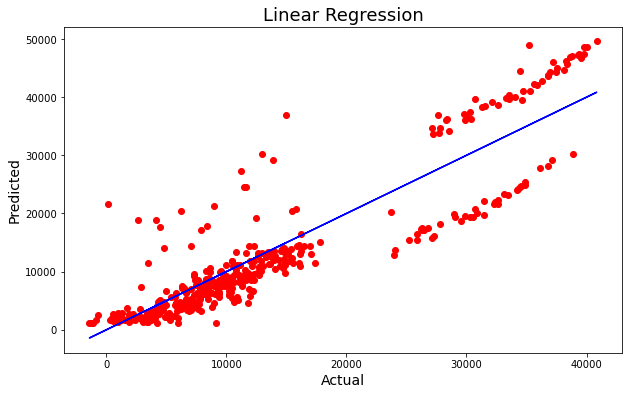

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(x = pred_LR, y = y_test, color = 'r')
plt.plot(pred_LR, pred_LR, color = 'b')
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title("Linear Regression", fontsize = 18)
plt.show()

In [46]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RFR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_RFR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score:  0.8954745419809773
R2_score on training data:-  97.2053706744566
Mean Absolute Error:-  2259.125645421724
Mean Squared Error:-  15947984.732212711
Root Mean Squared Error:-  3993.492798567779


In [47]:
KNN = KNN()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_KNN))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_KNN))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_KNN))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_KNN)))

R2_score:  0.8563501742148685
R2_score on training data:-  85.85323135123244
Mean Absolute Error:-  3017.257427708955
Mean Squared Error:-  21917390.0007151
Root Mean Squared Error:-  4681.6012218807255


In [48]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GBR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_GBR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score:  0.9125648922848675
R2_score on training data:-  89.20974656760883
Mean Absolute Error:-  2184.2966076313714
Mean Squared Error:-  13340422.413136294
Root Mean Squared Error:-  3652.454299938097


In [49]:
LA = Lasso()
LA.fit(x_train, y_train)
pred_LA = LA.predict(x_test)
pred_train = LA.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LA))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_LA))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_LA))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_LA)))

R2_score:  0.8041654365641747
R2_score on training data:-  72.53763490441396
Mean Absolute Error:-  3916.4118419810025
Mean Squared Error:-  29879482.82556864
Root Mean Squared Error:-  5466.212841224593


In [50]:
RD = Ridge()
RD.fit(x_train, y_train)
pred_RD = LR.predict(x_test)
pred_train = RD.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RD))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_RD))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2_score:  0.8041576323426198
R2_score on training data:-  72.53754715329912
Mean Absolute Error:-  3916.569265561581
Mean Squared Error:-  29880673.555641137
Root Mean Squared Error:-  5466.321757419804


In [51]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred_DTR = DTR.predict(x_test)
pred_train = DTR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_DTR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_DTR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2_score:  0.8058973826611473
R2_score on training data:-  99.86401505730052
Mean Absolute Error:-  2325.581290221393
Mean Squared Error:-  29615230.934833005
Root Mean Squared Error:-  5441.987774226713


In [52]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_svr))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_svr))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score:  -0.07313099244868915
R2_score on training data:-  -9.196600273815815
Mean Absolute Error:-  8523.47380438049
Mean Squared Error:-  163733094.3828185
Root Mean Squared Error:-  12795.823317896293


In [53]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(x_train, y_train)
pred_ETR = ETR.predict(x_test)
pred_train = ETR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_ETR))
print('R2_score on training data:- ',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:- ',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:- ',mean_squared_error(y_test, pred_ETR))
print("Root Mean Squared Error:- ",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2_score:  0.8778877546788122
R2_score on training data:-  99.86401505730052
Mean Absolute Error:-  2333.1096336757464
Mean Squared Error:-  18631290.987924676
Root Mean Squared Error:-  4316.397918163324


# Cross Validation Score

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
# Checking cv score for LinearRegression
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_LR) - score.mean())

[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954
Difference between R2 score and cross validation score is -  0.056901684984524414


In [56]:
# Checking cv score for RandomForestRegression
score1 = cross_val_score(RFR, x, y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_RFR) - score1.mean())

[0.85388314 0.77288029 0.87070538 0.8306594  0.8543844 ]
0.8365025233073945
Difference between R2 score and cross validation score is -  0.058972018673582816


In [57]:
# Checking cv score for KNeighborsRegressor
score2 = cross_val_score(KNN, x, y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_KNN) - score2.mean())

[0.8221881  0.7555254  0.83987794 0.8050002  0.80856984]
0.8062322958732286
Difference between R2 score and cross validation score is -  0.05011787834163983


In [58]:
# Checking cv score for GradientBoostingRegressor
score3 = cross_val_score(GBR, x, y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_GBR) - score3.mean())

[0.87514127 0.79067137 0.89420007 0.84919394 0.85974135]
0.853789600052768
Difference between R2 score and cross validation score is -  0.05877529223209943


In [59]:
# Checking cv score for Lasso
score4 = cross_val_score(LA, x, y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_LA) - score4.mean())

[0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
0.7472609349374297
Difference between R2 score and cross validation score is -  0.056904501626744985


In [60]:
# Checking cv score for Ridge
score5 = cross_val_score(RD, x, y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_RD) - score5.mean())

[0.76124956 0.70849269 0.77774855 0.73370746 0.75510598]
0.7472608501582403
Difference between R2 score and cross validation score is -  0.056896782184379546


In [61]:
# Checking cv score for DecisionTreesRegressor
score6 = cross_val_score(DTR, x, y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_DTR) - score6.mean())

[0.77056485 0.6821144  0.7288077  0.71326672 0.67801862]
0.7145544576040064
Difference between R2 score and cross validation score is -  0.09134292505714092


In [62]:
# Checking cv score for SVR
score7 = cross_val_score(svr, x, y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_svr) - score7.mean())

[-0.10984404 -0.10765325 -0.07634203 -0.10157605 -0.1023228 ]
-0.09954763482596682
Difference between R2 score and cross validation score is -  0.02641664237727767


In [63]:
# Checking cv score for ETR
score8 = cross_val_score(ETR, x, y)
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_ETR) - score8.mean())

[0.83644493 0.74644009 0.84892413 0.81326947 0.84213656]
0.8174430366654238
Difference between R2 score and cross validation score is -  0.060444718013388354


In [64]:
# Checking cv score for SVR
score7 = cross_val_score(svr, x, y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is - ", r2_score(y_test, pred_svr) - score7.mean())

[-0.10984404 -0.10765325 -0.07634203 -0.10157605 -0.1023228 ]
-0.09954763482596682
Difference between R2 score and cross validation score is -  0.02641664237727767


# Gradient Boosting Regressor is our best Model

# Hyper Parameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param = {'n_estimators':[500,1000,2000],
         'learning_rate':[.001,0.01,.1],
         'max_depth':[1,2,4],
         'subsample':[.5,.75,1],
         'random_state':[1]}

In [67]:
gscv = GridSearchCV(GradientBoostingRegressor(), param, cv = 5)

In [68]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [500, 1000, 2000], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]})

In [69]:
gscv.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.75}

In [70]:
Model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 2, n_estimators = 500, random_state =1, subsample = 0.75)

In [71]:
Model.fit(x_train, y_train)
print('R2 score: - ', r2_score(y_test, pred))
print('Mean Absolute Error: - ', mean_absolute_error(y_test, pred))
print('Mean Squared error: - ', mean_squared_error(y_test, pred))
print("Root Mean Squared Error: - ",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: -  -0.696369260393781
Mean Absolute Error: -  11750.100738299348
Mean Squared error: -  258823750.47839037
Root Mean Squared Error: -  16088.000201342315


# Saving the model

In [72]:
import joblib
joblib.dump(Model, "medical_cost_insurance.pki")

['medical_cost_insurance.pki']

# Predicting the saved model

In [74]:
import pickle
filename = "medical_cost_insurance.pki"
pickle.dump(Model, open(filename, 'wb'))

In [75]:
import pickle
loaded_model = pickle.load(open("medical_cost_insurance.pki", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

91.60049775269792
